# Interpolation
- 2023/11/28

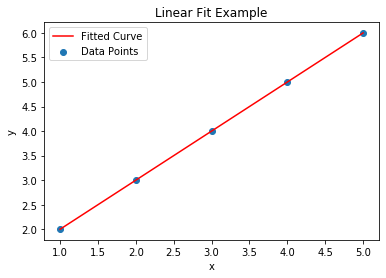

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the linear function model
def linear_model(x, a, b):
    return a * x + b

# Example data points
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2, 3, 4, 5, 6])

# Compute the means of x_data and y_data
x_mean = np.mean(x_data)
y_mean = np.mean(y_data)

# Calculate the slope (a) using the formula
# a = sum((x_i - x_mean) * (y_i - y_mean)) / sum((x_i - x_mean)^2)
a = np.sum((x_data - x_mean) * (y_data - y_mean)) / np.sum((x_data - x_mean)**2)

# Calculate the intercept (b) using the formula
# b = y_mean - a * x_mean
b = y_mean - a * x_mean

# Use the fitted parameters to calculate the model's y values
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = linear_model(x_fit, a, b)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit Example')
plt.show()


In [12]:
# Author: Junfei Ding, Guizhou University, Date: 2023-11-28

import numpy as np

def f(x):
    return 1/(1 + 25*x**2)

def generatedata(n,f,nodes="cheb"):
    if nodes=="cheb":
        dataxs = -np.cos(np.linspace(0,np.pi,n))
    else:
        dataxs = np.linspace(-1,1,n)
    datays = f(dataxs)
    return dataxs, datays

def weights(dataxs):
    n = dataxs.size
    ws = np.ones(n)
    for k in range(n):
        for j in range(n):
            if j == k:
                continue
            ws[k] *= (dataxs[k]-dataxs[j])
    return 1/ws

def bary(dataxs,datays,ws,x):
    k = np.where(x == dataxs)[0]
    print(j)
    if k.size == 0:
        nume = np.sum(ws*datays/(x-dataxs))
        denom = np.sum(ws/(x-dataxs))
        val = nume/denom
    else:
        val = datays[k[0]]
    return val

if __name__ == '__main__':
    dataxs, datays = generatedata(15, f)
    print(dataxs)
    ws = weights(dataxs)
    x = 1.0; pofx = bary(dataxs, datays, ws, x)
    print(x, pofx, f(x))


[-1.00000000e+00 -9.74927912e-01 -9.00968868e-01 -7.81831482e-01
 -6.23489802e-01 -4.33883739e-01 -2.22520934e-01 -6.12323400e-17
  2.22520934e-01  4.33883739e-01  6.23489802e-01  7.81831482e-01
  9.00968868e-01  9.74927912e-01  1.00000000e+00]
[14]
[14]
1.0 0.038461538461538464 0.038461538461538464


In [13]:
import numpy as np

def helpers(dataxs,datays,datasigs):
    S = np.sum(1/datasigs**2)
    Sx = np.sum(dataxs/datasigs**2)
    Sy = np.sum(datays/datasigs**2)
    Sxx = np.sum(dataxs**2/datasigs**2)
    Sxy = np.sum(dataxs*datays/datasigs**2)
    Del = S*Sxx - Sx**2
    return S, Sx, Sy, Sxx, Sxy, Del

def computecs(dataxs,datays,datasigs):
    S,Sx,Sy,Sxx,Sxy,Del = helpers(dataxs,datays,datasigs)
    cs = np.zeros(2); dcs = np.zeros(2)
    cs[0] = (Sxx*Sy - Sx*Sxy)/Del
    cs[1] = (S*Sxy - Sx*Sy)/Del
    dcs[0] = np.sqrt(Sxx/Del)
    dcs[1] = np.sqrt(S/Del)
    return cs, dcs

def computechisq(dataxs,datays,datasigs,cs):
    chisq = np.sum((datays-cs[0]-cs[1]*dataxs)**2/datasigs**2)
    return chisq

dataxs = np.linspace(0,1,6)
datays = np.array([3.085, 3.123, 3.224, 3.360, 3.438, 3.569])
datasigs = np.array([0.048, 0.053, 0.02, 0.005, 0.023, 0.07])

cs, dcs = computecs(dataxs, datays, datasigs)
print(cs); print(dcs)
chisq = computechisq(dataxs, datays, datasigs, cs)
print(chisq/(dataxs.size - cs.size))

[3.04593186 0.5189044 ]
[0.02927752 0.04896135]
1.0991681955435215
